In [ ]:
"""
MNIST Handwritten Digit Classification Example

- Loads MNIST dataset using fetch_openml
- Splits into train/test sets
- Normalizes data
- Trains a simple SGDClassifier
- Evaluates and visualizes predictions
"""

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# This imports the function 'fetch_openml' from scikit-learn.
# It is used to download datasets directly from the OpenML repository.
from sklearn.datasets import fetch_openml

# This downloads the MNIST dataset (70,000 handwritten digit images).
# Each image is 28x28 pixels (flattened into 784 features).
# The dataset is returned as a dictionary-like object containing:
#   - data: the pixel values of the images
#   - target: the labels (the actual digit 0–9 for each image)
data = fetch_openml("mnist_784",version=1)

In [44]:
# Split the dataset into features (X) and labels (y)
X = data["data"]       # Pixel values of the images (784 features per image)
y = data["target"]     # Corresponding digit labels (0–9)

# Print the shape of features and labels to understand the dataset dimensions
print(X.shape)         # (70000, 784) → 70,000 images, each with 784 pixels
print(y.shape)         # (70000,) → 70,000 labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize pixel values of training and testing images to [0,1]
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# Convert labels to integer type for classification
y_train = y_train.astype(int)
y_test = y_test.astype(int)

(70000, 784)
(70000,)


In [31]:
# X_train: training images (features used to train the model)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


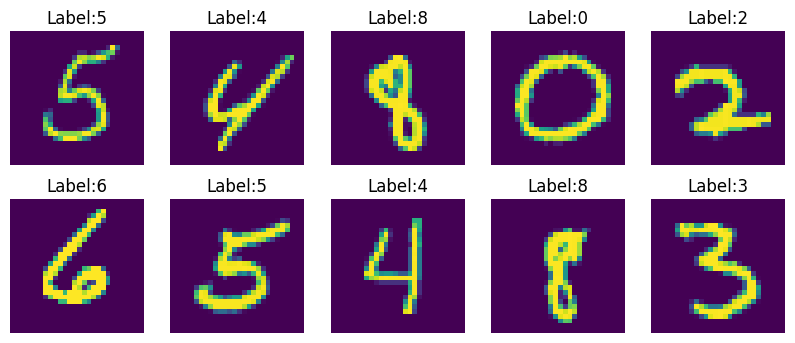

In [45]:
# Display the first 10 training images in a 2x5 grid
# - Reshape each image from 1D (784 pixels) to 28x28 2D array
# - Show the corresponding label as the title
# - Turn off axes for a cleaner look

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.array(X_train.iloc[i]).reshape(28,28))
    plt.title(f"Label:{y_train.iloc[i]}")
    plt.axis("off")
plt.show()

In [50]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train , y_train)

SGDClassifier()

In [51]:
accuracy = model.score(X_test,y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9100


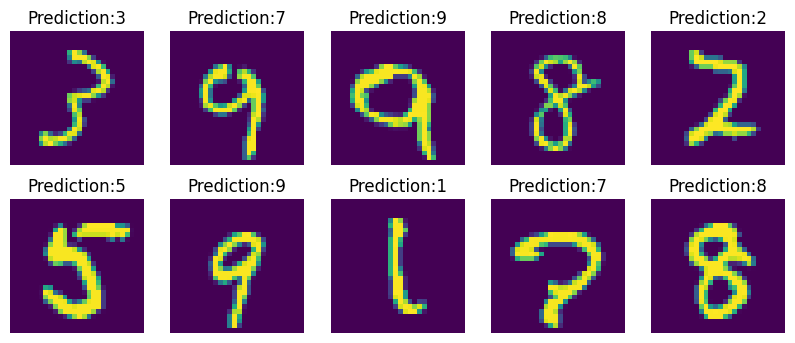

In [59]:
# Display predictions for 10 test images
predictions = model.predict(X_test.iloc[10:20])

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.array(X_test.iloc[10+i]).reshape(28,28))
    plt.title(f"Prediction:{predictions[i]}")
    plt.axis("off")
plt.show()

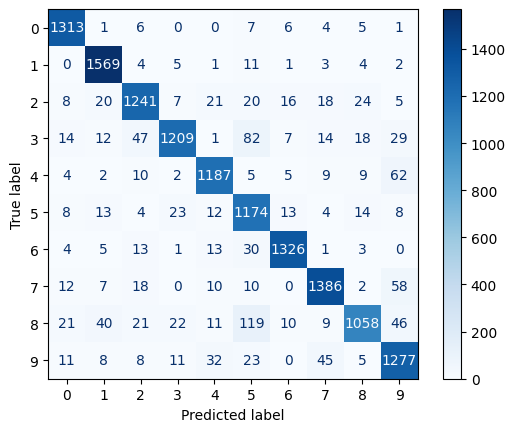

In [68]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# - Each row represents the true class (y_test)
# - Each column represents the predicted class (y_pred)
# - Diagonal cells indicate correct predictions
# - Off-diagonal cells indicate misclassifications
# - Darker cells correspond to higher counts

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap="Blues")
plt.show()

# This helps quickly see which digits the model predicts well and which it confuses